### Suleman Salmani

## Task_6
**Create the Decision Tree classifier and visualize it graphically.**

#### Import Necessary Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix
import os
%matplotlib inline

#### Data
*We will use Iris dataset that has 150 rows and 5 columns including target column. We have 3 classes to classify*

### Read the Data

In [3]:
os.chdir('E:\Internships\The Spark Foundation\Tasks\Data-Science-and-Business-Analytics-Internship-Tasks-TSF-\Task_Decision_tree_Classifier')

In [4]:
Data=pd.read_csv('iris.csv')
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Drop Id column 
*There is no need to keep the Id column in the Data because it won't help in prediction.*

In [5]:
Data.drop('Id',axis=1,inplace=True)

### Visualize the data
*I am gonna create 4 scatter plot to see the variation in the values in each column for each class*

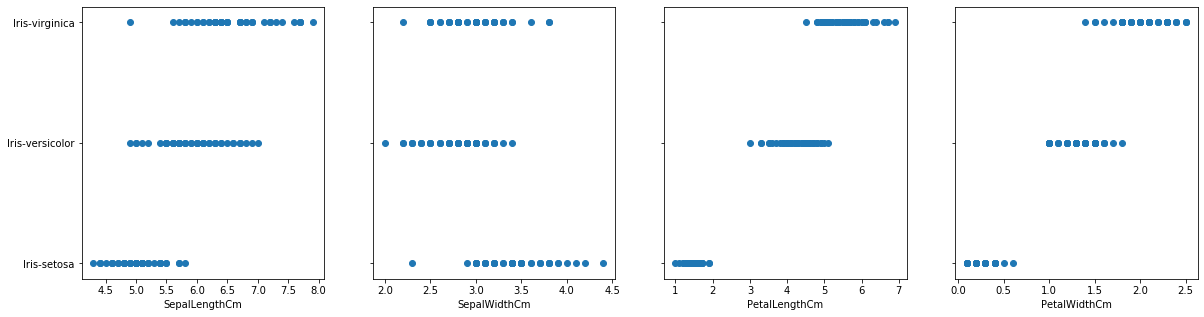

In [6]:
columns=Data.columns.tolist()
columns=columns[:-1]
fig, ax=plt.subplots(1,4,sharey=True,figsize=(20,5))
for i,j in enumerate(columns):
    ax[i].scatter(j,'Species',data=Data)
    ax[i].set_xlabel(j)
plt.show()

*In the above plots we can see that for PetalLength and PetalWidth there is a certain range for each class so, it would help a lot to our model to correctly classify each class.*

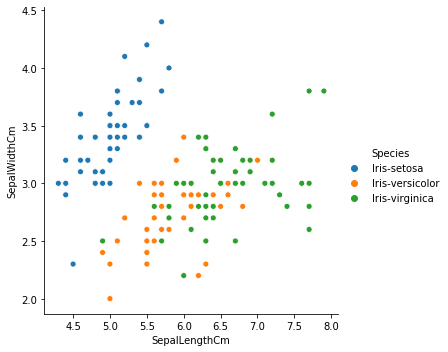

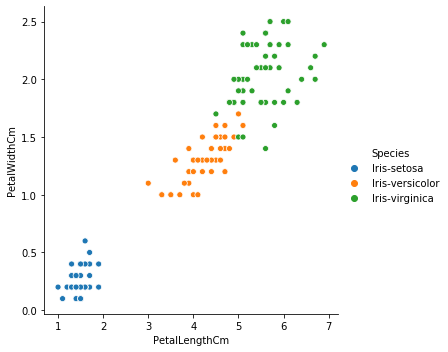

In [7]:
ax1=sns.relplot('SepalLengthCm','SepalWidthCm',hue='Species',data=Data)
ax2=sns.relplot('PetalLengthCm','PetalWidthCm',hue='Species',data=Data)
plt.show()

**In above plots if we talk about the second plot there is a pattern in the plot**

*Low values of PetalLengthCm and PetalWidthCm belong to Iris-Setosa. Average values of PetalLengthCm and PetalWidthCm belong to Iris-Versicolor. High values of PetalLengthCm and PetalWidthCm belong to Iris-Virginica.*

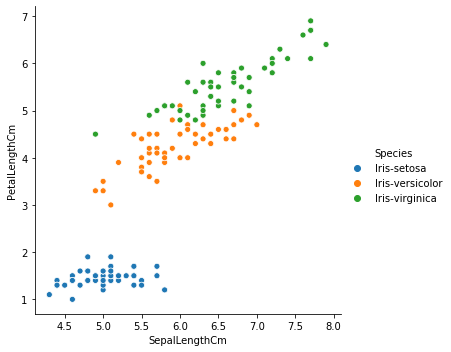

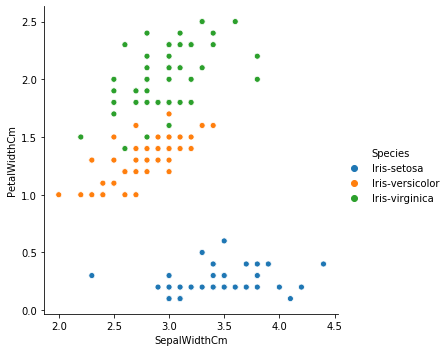

In [8]:
sns.relplot('SepalLengthCm','PetalLengthCm',hue='Species',data=Data,kind='scatter')
sns.relplot('SepalWidthCm','PetalWidthCm',hue='Species',data=Data,kind='scatter')
plt.show()

*There is a pattern in the above plots also. Here we can easily differentiate between the classes accroding to the given attributes*

#### Extracting Features and Target from the Data

In [17]:
X=Data[columns]
y=Data.iloc[:,-1]

### Split the Data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


**I have splitted the data into 70% train set and 30% test set.**

### Train the Model

In [19]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Training Completed.**

### Test the Model

In [20]:
y_pred=DTC.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

1.0

In [22]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


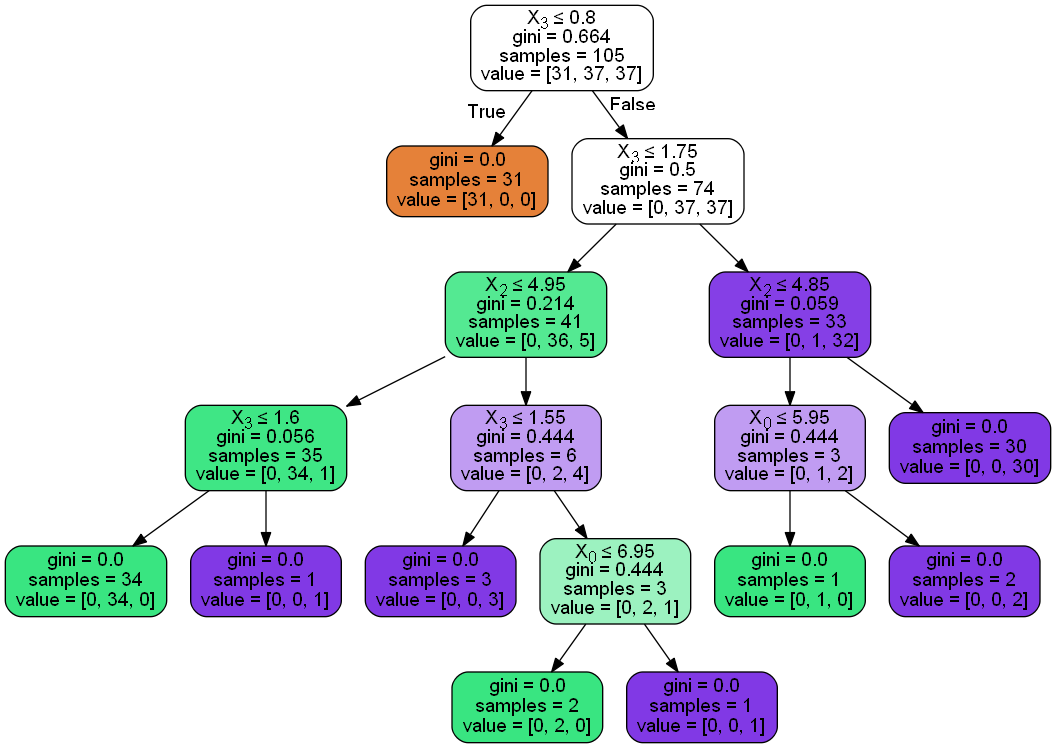

In [53]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### ---------------------------------------------------------------------------------Thank You-------------------------------------------------------------------------------------------